In [1]:
import geopandas as gpd
import fiona

# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Print out the list of country names
country_names = world['name'].unique()
print(country_names)


['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

C:\Users\behno\AppData\Local\Temp\ipykernel_5528\3048967592.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_without_canada['Country of citizenship'] = grouped_data_without_canada['Country of citizenship'].replace({
C:\Users\behno\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


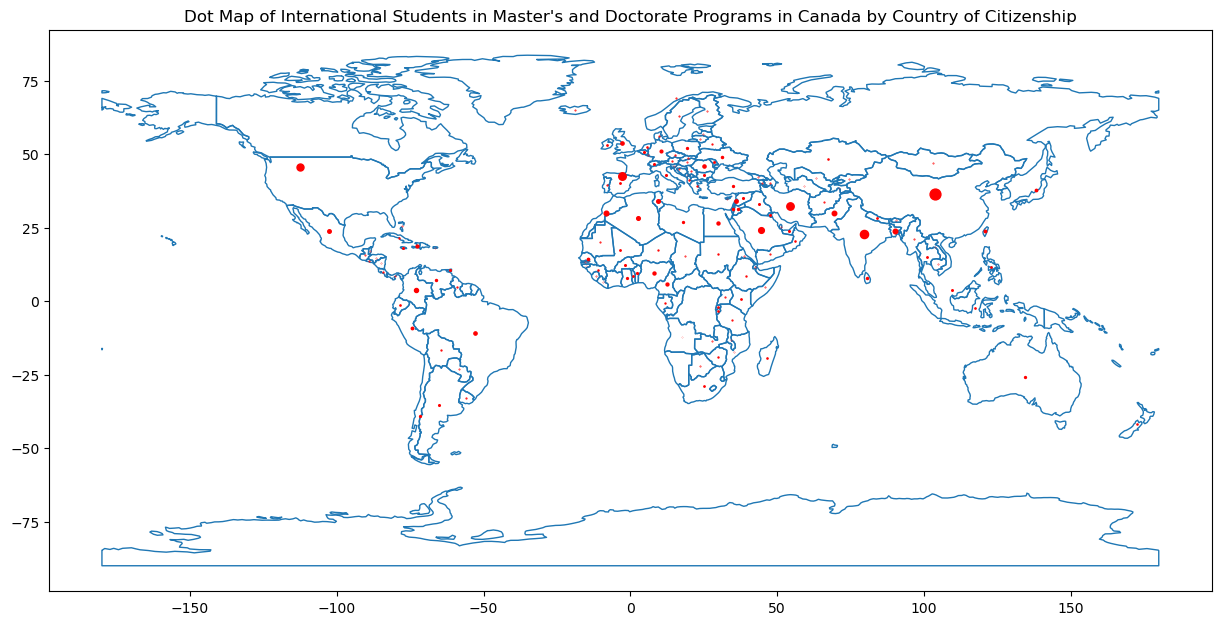

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'CSV Resources/cleaned_gradschool_enrolment_international_student.csv'  # Change if needed
file_path2 = 'CSV Resources/population_Updated.csv' # Change if needed
data = pd.read_csv(file_path)
pop_data = pd.read_csv(file_path2)

# Filtering the data for GEO=Canada and for Master's and Doctorate degrees
canada_data = data[data['GEO'] == 'Canada']
masters_doctorate_data = canada_data[
    canada_data['International Standard Classification of Education (ISCED)'].isin(
        ["Master's or equivalent", "Doctorate or equivalent"]
    )
]

# Grouping the data by country and summing the values
grouped_data = masters_doctorate_data.groupby('Country of citizenship')['VALUE'].sum().reset_index()

# Cleaning the country names in grouped_data to match the world dataset
grouped_data['Country of citizenship'] = grouped_data['Country of citizenship'].str.split('[').str[0].str.strip()

# Filtering out Canada from the 'Country of citizenship' column
grouped_data_without_canada = grouped_data[grouped_data['Country of citizenship'] != 'Canada']

#Match the names of countries with name mismatches between the World Bank, Census, and Geopandas

grouped_data_without_canada['Country of citizenship'] = grouped_data_without_canada['Country of citizenship'].replace({
    'Russian Federation': 'Russia',
    'Congo, Republic of the': 'Dem. Rep. Congo',
    'Congo,  The Democratic Republic of the':'Dem. Rep. Congo',
    'South Africa, Republic of':'South Africa',
    # Add other replacements as needed
})

# Summing the 'VALUE' for each country
grouped_sum = grouped_data_without_canada.groupby('Country of citizenship')['VALUE'].sum().reset_index()


# Merge the population data with your grouped_sum data
merged_with_population = pd.merge(grouped_sum, pop_data, left_on='Country of citizenship', right_on='Country')

# Calculate per capita values (e.g., per 100,000 people)
merged_with_population['Per_Capita'] = (merged_with_population['VALUE'] / merged_with_population['Population']) * 100000

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the original summed data with world map data
merged_summed_data = world.set_index('name').join(merged_with_population.set_index('Country of citizenship'))

# Merging the per capita data with world map data
merged_per_capita_data = world.set_index('name').join(merged_with_population.set_index('Country of citizenship'))


# # Plotting dots: This snippet plots a world map with dots at each center of a country (size of the dot matches the number of students)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
for idx, row in merged_summed_data.iterrows():
    if pd.notnull(row['geometry'].centroid) and row['VALUE'] > 0:
        plt.plot(row['geometry'].centroid.x, row['geometry'].centroid.y, 'o', color='red', markersize=(row['VALUE'] / 1000)**0.5)
plt.title('Dot Map of International Students in Master\'s and Doctorate Programs in Canada by Country of Citizenship')
plt.savefig('Outputs/Dotplot_OGvalues_plot.png')
plt.show()




In [3]:
#merged_summed_data['Country'].unique()
grouped_sum['Country of citizenship'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Caribbean and Bermuda', 'Central Africa',
       'Central African Republic', 'Central America', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Eastern Africa',
       'Eastern Asia', 'Eastern Europe', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Eritrea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Europe', 'Finland', 'France', 'Fren

In [4]:
# List of countries in our dataset
countries_in_our_data = set(merged_with_population['Country of citizenship'])

# List of countries in the GeoPandas world dataset
countries_in_world_map = set(world['name'])
print(countries_in_world_map)

# Find countries that are in our dataset but not in the GeoPandas dataset or with a different name
mismatched_countries = countries_in_our_data - countries_in_world_map
print("Mismatched Countries:", mismatched_countries)


{'Guinea-Bissau', 'Togo', 'Taiwan', 'Luxembourg', 'eSwatini', 'Kyrgyzstan', 'Norway', 'New Zealand', 'Papua New Guinea', 'Brunei', 'Ireland', 'Myanmar', 'Cameroon', 'Vietnam', 'Greece', 'Japan', 'Madagascar', 'Dominican Rep.', 'Pakistan', 'Denmark', 'Bulgaria', 'Argentina', 'Kenya', 'Australia', 'Angola', 'Senegal', 'Saudi Arabia', 'Nigeria', 'Zambia', 'Iran', 'Jordan', 'Rwanda', 'Ecuador', 'N. Cyprus', 'Serbia', 'Panama', 'North Korea', 'Canada', 'Laos', 'Kosovo', 'Oman', 'Iraq', 'Mali', 'Uganda', 'Moldova', 'Mexico', 'United Kingdom', 'Bahamas', 'Costa Rica', 'Nicaragua', 'Eritrea', 'Uruguay', 'Bhutan', 'Puerto Rico', 'Malawi', 'Russia', 'Thailand', 'Ghana', 'Central African Rep.', 'Albania', 'United States of America', 'Solomon Is.', 'South Korea', 'Slovakia', 'Slovenia', 'Nepal', 'Bangladesh', 'Croatia', 'Botswana', 'Honduras', 'Suriname', 'Kuwait', 'Ukraine', 'Montenegro', 'Poland', 'Zimbabwe', 'Tunisia', 'Guatemala', 'Mauritania', 'Spain', 'France', 'Fr. S. Antarctic Lands', 'Pal

C:\Users\behno\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\behno\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


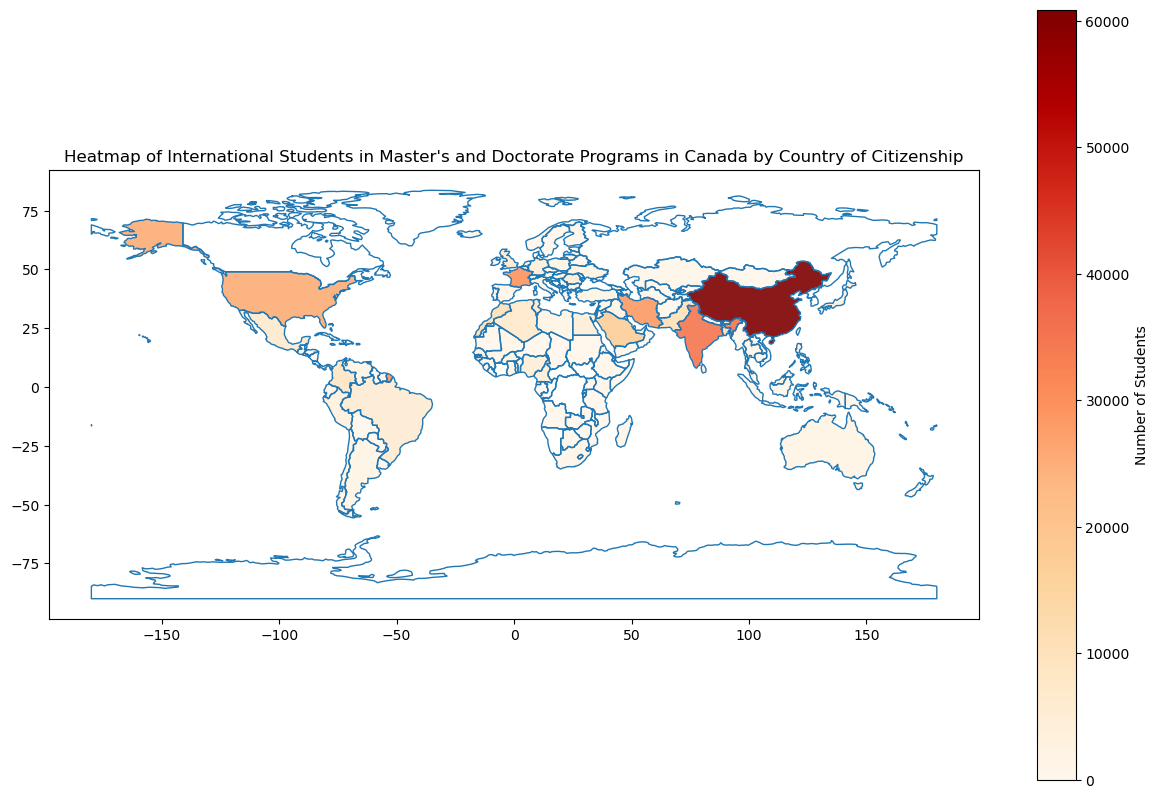

In [5]:
# Plotting heatmap - Original Values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
merged_summed_data.plot(column='VALUE', ax=ax, legend=True,
                        legend_kwds={'label': "Number of Students"},
                        cmap='OrRd', alpha=0.9)
plt.title('Heatmap of International Students in Master\'s and Doctorate Programs in Canada by Country of Citizenship')
plt.savefig('Outputs/Heatmap_OGvalues_plot.png')

plt.show()


C:\Users\behno\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\behno\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


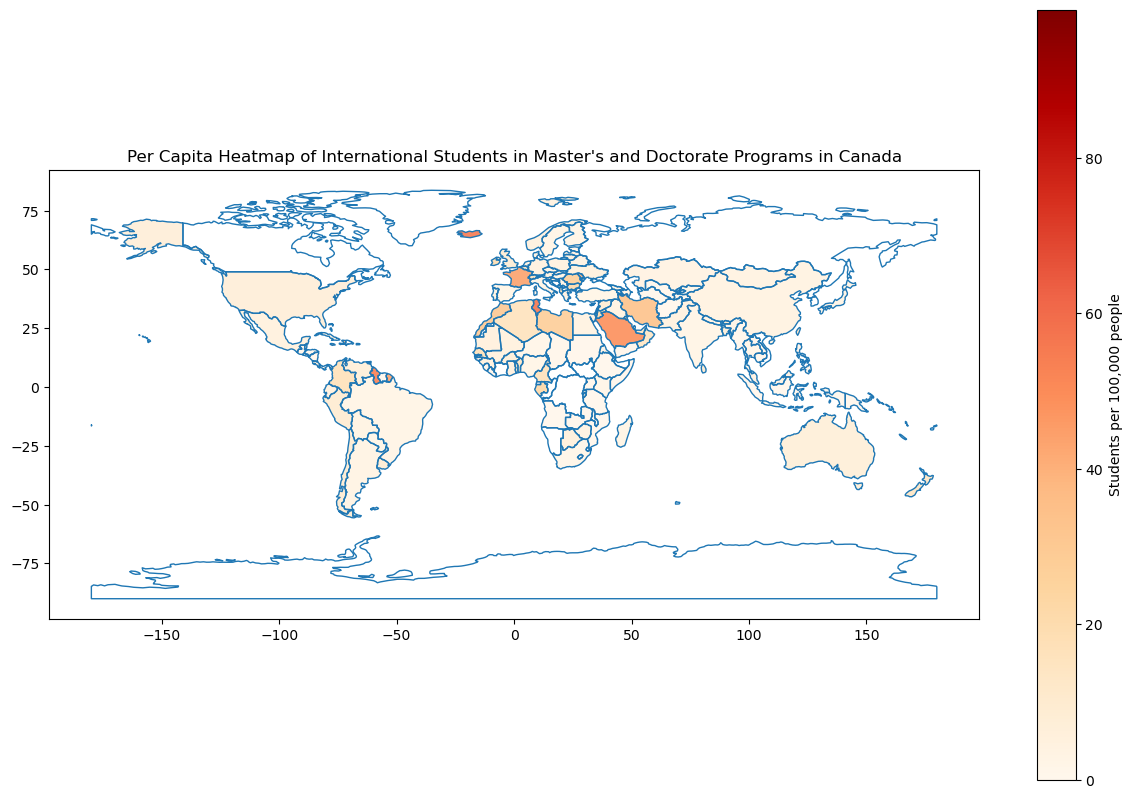

In [6]:
# Plotting heatmap - Per Capita Values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
merged_per_capita_data.plot(column='Per_Capita', ax=ax, legend=True,
                            legend_kwds={'label': "Students per 100,000 people"},
                            cmap='OrRd', alpha=0.9)
plt.title('Per Capita Heatmap of International Students in Master\'s and Doctorate Programs in Canada')
plt.savefig('Outputs/Heatmap_percapita_plot.png')

plt.show()

